In [ ]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 2.5 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3148189 sha256=89d20d4bd83f630931c3f72021a10bb16bdc202b6f5af903e9888340d2c61051
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
import pandas as pd
import fasttext
import csv
import os
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/cs168/all_months.csv")

Mounted at /content/drive


In [ ]:
NUM_MONTHS = 6

## Prep Dataset

## Load and reformat label shift dataset

In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/My Drive/cs168/all_months.csv")
df.head()

,review_body,review_title,stars,month
0,Zipper broke after a few washes,One Star,1,1
1,The pictures product is not what was received....,Wouldn't recommend,1,1
2,Item was not packaged AT ALL and came in with ...,Not happy with the purchase,1,1
3,I purchase this and the box and bag was so blo...,Damage box and container.,1,1
4,After the third time using only plastic utensi...,I wouldn't buy it again!,1,1


In [ ]:
# Combine review body and title into one column "review" and make it lowercase
df = df.fillna("")
df["review"] = df["review_title"] + " " + df["review_body"]
df["review"] = df["review"].str.lower()
df.head()

,review_body,review_title,stars,month,review
0,Zipper broke after a few washes,One Star,1,1,one star zipper broke after a few washes
1,The pictures product is not what was received....,Wouldn't recommend,1,1,wouldn't recommend the pictures product is not...
2,Item was not packaged AT ALL and came in with ...,Not happy with the purchase,1,1,not happy with the purchase item was not packa...
3,I purchase this and the box and bag was so blo...,Damage box and container.,1,1,damage box and container. i purchase this and ...
4,After the third time using only plastic utensi...,I wouldn't buy it again!,1,1,i wouldn't buy it again! after the third time ...


In [ ]:
df_4 = df[df['month'] == 1]
df_4 = df_4[df_4['stars'] == 1]
df_4.head()

,review_body,review_title,stars,month,review
0,Zipper broke after a few washes,One Star,1,1,one star zipper broke after a few washes
1,The pictures product is not what was received....,Wouldn't recommend,1,1,wouldn't recommend the pictures product is not...
2,Item was not packaged AT ALL and came in with ...,Not happy with the purchase,1,1,not happy with the purchase item was not packa...
3,I purchase this and the box and bag was so blo...,Damage box and container.,1,1,damage box and container. i purchase this and ...
4,After the third time using only plastic utensi...,I wouldn't buy it again!,1,1,i wouldn't buy it again! after the third time ...


## Define utility functions

In [ ]:
# Get the dataframe for a certain month
def get_month_df(df: pd.DataFrame, month: int) -> pd.DataFrame:
    assert "month" in df
    return df[df["month"] == month]

In [ ]:
# Add label to dataframe (__label__ is used for fasttext)
def add_fasttext_label(df: pd.DataFrame) -> pd.DataFrame:
    assert "stars" in df
    if "label" in df:
        return df
    df["label"] = df.apply(lambda row: "__label__" + str(row.stars), axis=1)
    return df

In [ ]:
# Write the column(s) of a dataframe to a text file (used for training word embeddings)
def write_reviews_to_file(df: pd.DataFrame, columns, fname: str) -> pd.DataFrame:
    df[columns].to_csv(fname, 
        index=False, 
        sep=' ', 
        header=False,
        quoting=csv.QUOTE_NONE, 
        quotechar="", 
        escapechar=" ",
        encoding='utf-8')
    return

In [ ]:
# Train embeddings on file
def train_fasttext_embeddings(fname: str):
    return fasttext.train_unsupervised(fname, model='cbow')

In [ ]:
# Train fasttext model
def train_fasttext(fname: str, lr):
    return fasttext.train_supervised(fname, ws = 3, lr = 0.3)

In [ ]:
# Reset files
def delete_text_files(dir_name: str) -> None:
    for item in os.listdir(dir_name):
        if item.endswith(".txt"):
            os.remove(os.path.join(dir_name, item))

In [ ]:
# Concatenate two months' reviews
def concat_months(df: pd.DataFrame, month1: int, month2: int) -> pd.DataFrame:
    assert "month" in df
    return df[(df["month"] == month1) | (df["month"] == month2)]

In [ ]:
# Concatenate two months' reviews, accumulative
def concat_months_acc(orig_df: pd.DataFrame, cur_df: pd.DataFrame, month1: int) -> pd.DataFrame:
    assert "month" in df
    to_append = df[df["month"] == month1]
    return cur_df.append(to_append)

## Write reviews and training data for each month to text files

In [ ]:
# Reset files
delete_text_files("/content/drive/My Drive/cs168/")

In [ ]:
# Write reviews for each month to its own text file
for month in range(1, NUM_MONTHS+1):
    month_df = get_month_df(df=df, month=month)
    write_reviews_to_file(df=month_df, columns=["review"], fname=f"/content/drive/My Drive/cs168/month_{month}.txt")

In [ ]:
# Write reviews + labels for each month to its own text file
for month in range(1, NUM_MONTHS+1):
    month_df = get_month_df(df=df, month=month)
    month_df = add_fasttext_label(df=month_df)
    write_reviews_to_file(df=month_df, columns=["label", "review"], fname=f"/content/drive/My Drive/cs168/month_{month}.label.txt")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# COCATENATED MONTHS (sliding window = 2) Write reviews, reviews + labels
cur_month = 1
while (cur_month < NUM_MONTHS):

  month_name = str(cur_month) + str(cur_month+1)
  print("month name: ", month_name)
  concat_df = concat_months(df, cur_month, cur_month+1)
  write_reviews_to_file(df=month_df, columns=["review"], fname=f"/content/drive/My Drive/cs168/month_{month_name}.txt")

  concat_df = add_fasttext_label(df=concat_df)
  write_reviews_to_file(df=concat_df, columns=["label", "review"], fname=f"/content/drive/My Drive/cs168/month_{month_name}.label.txt")
  cur_month += 1

month name:  12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


month name:  23
month name:  34
month name:  45
month name:  56


In [ ]:
# CONCATENATED MONTHS (CUMULATIVE) Write reviews + labels
month_name = "1"
last_df = df[df['month'] == 1]
cur_month = 2
while (cur_month <= NUM_MONTHS):
  month_name += str(cur_month)
  print("month name: ", month_name)

  concat_df = concat_months_acc(df, last_df, cur_month)
  last_df = concat_df
  concat_cpy = concat_df.copy()
  write_reviews_to_file(df=concat_cpy, columns=["review"], fname=f"/content/drive/My Drive/cs168/month_{month_name}.txt")

  withlabels_df = add_fasttext_label(df=concat_cpy)

  write_reviews_to_file(df=withlabels_df, columns=["label", "review"], fname=f"/content/drive/My Drive/cs168/month_{month_name}.label.txt")
  cur_month += 1

month name:  12
month name:  123
month name:  1234
month name:  12345
month name:  123456


In [ ]:
model = train_fasttext(fname="/content/drive/My Drive/cs168/month_123.label.txt", lr = 0.1)

In [ ]:
print(model.words)
print(model.labels)

['the', 'i', 'and', '</s>', 'to', 'a', 'it', 'for', 'this', 'is', 'my', 'of', 'in', 'but', 'not', 'great', 'was', 'with', 'very', 'on', 'that', 'have', 'so', 'as', 'are', 'good', 'they', 'you', 'like', 'love', 'these', 'one', 'just', 'be', 'easy', 'would', 'product', 'stars', 'use', 'had', 'really', 'will', 'at', 'them', 'works', 'if', 'than', 'when', 'all', 'no', 'quality', 'up', 'what', 'nice', 'from', 'can', 'well', "it's", 'or', 'out', 'little', 'more', 'it.', 'has', 'only', 'we', 'get', 'bought', 'me', 'fit', 'perfect', 'after', 'too', 'an', 'because', 'work', 'were', 'five', 'about', 'used', 'buy', 'your', 'much', 'do', 'got', 'time', 'other', 'does', 'small', 'it’s', 'some', 'size', 'am', 'looks', 'put', 'there', 'even', 'price', 'two', 'been', '...', 'better', 'made', "i'm", 'book', 'first', 'which', 'how', 'he', 'did', 'best', 'back', "don't", 'also', 'off', 'recommend', 'still', 'pretty', 'make', 'our', 'super', 'she', 'by', 'need', 'using', 'came', 'look', 'case', 'light', '

In [ ]:
model.predict("HORRIBLE", k = 3)

(('__label__5', '__label__1', '__label__4'),
 array([0.99287361, 0.00314004, 0.00309877]))

In [ ]:
def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))

print_results(*model.test("/content/drive/My Drive/cs168/month_12.label.txt"))
model_test = model.test("/content/drive/My Drive/cs168/month_1.label.txt")
print(model_test[1])

N	6000
P@1	0.658
R@1	0.658
0.6846666666666666


In [ ]:
# Test on different learning rates
def fasttext_bulktrain(train_fname, test_fname, learning_rates: list):
  best_model_acc = 0
  best_model = None
  ws = 5

  for lr in learning_rates:
    model = fasttext.train_supervised(train_fname, ws = ws, lr = lr)
    test_results = model.test(test_fname)
    # print("lr:", lr, "; acc: ", test_results)
    if test_results[1] > best_model_acc: # comparing precisions
       best_model = model
       best_model_acc = test_results[1]

  return best_model, best_model_acc

In [ ]:
def print_lr_acc(train_month, test_month):
  lr = [i / 10 for i in range(10)]

  train = f'/content/drive/My Drive/cs168/month_{train_month}.label.txt'
  test = f'/content/drive/My Drive/cs168/month_{test_month}.label.txt'

  model, acc = fasttext_bulktrain(train, test, lr)
  print("Train:", train_month, "Test:", test_month, "best acc: ", acc)
  return train_month, test_month, acc

In [ ]:
# Single file prediction
train = 1
print_lr_acc(train, 1)
print_lr_acc(train, 2)
print_lr_acc(train, 3)
print_lr_acc(train, 4)
print_lr_acc(train, 5)

Train: 1 Test: 1 best acc:  0.7003333333333334
Train: 1 Test: 2 best acc:  0.6
Train: 1 Test: 3 best acc:  0.4
Train: 1 Test: 4 best acc:  0.3
Train: 1 Test: 5 best acc:  0.2


(1, 5, 0.2)

In [ ]:
# 2-month sliding window prediction
cur = 1
acc_1 = []
acc_2 = []
while (cur <= NUM_MONTHS - 2):
  _, _, acc = print_lr_acc(10*cur + cur+1, cur+2)
  acc_1 += [acc]
  print('vs.')
  _, _, acc = print_lr_acc(1, cur+2)
  acc_2 += [acc]
  print("\n")
  cur += 1

Train: 12 Test: 3 best acc:  0.41333333333333333
vs.
Train: 1 Test: 3 best acc:  0.4


Train: 23 Test: 4 best acc:  0.36333333333333334
vs.
Train: 1 Test: 4 best acc:  0.3


Train: 34 Test: 5 best acc:  0.25266666666666665
vs.
Train: 1 Test: 5 best acc:  0.2


Train: 45 Test: 6 best acc:  0.5053333333333333
vs.
Train: 1 Test: 6 best acc:  0.1




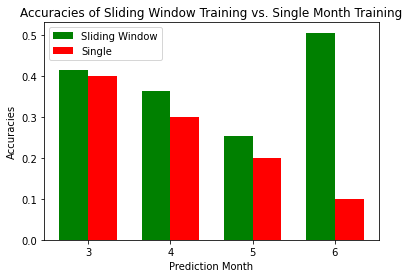

In [ ]:
# Sliding Window Plot
import numpy as np

width = 0.35
x = np.array([i for i in range(3,7)])

fig, ax = plt.subplots()
rects1 = ax.bar(x, acc_1, width, color='g')
rects2 = ax.bar(x + width, acc_2, width, color='r')
ax.set_ylabel('Accuracies')
ax.set_xlabel('Prediction Month')
ax.set_title('Accuracies of Sliding Window Training vs. Single Month Training')
ax.set_xticks(x + width/ 2)
ax.set_xticklabels(x)
ax.legend((rects1[0], rects2[0]), ('Sliding Window', 'Single'))
plt.show()

In [ ]:
# Cumulative prediction
cur = 3
train = "12"
acc1 = []
acc2 = []
x = [i for i in range(3,6)]
while (cur <= NUM_MONTHS):
  _, _, acc = print_lr_acc(train, cur)
  acc1 += [acc]
  train += str(cur)
  print('vs.')
  _, _, acc = print_lr_acc(1, cur)
  acc2 += [acc]
  print("\n")
  cur += 1

Train: 12 Test: 3 best acc:  0.41333333333333333
vs.
Train: 1 Test: 3 best acc:  0.4


Train: 123 Test: 4 best acc:  0.37333333333333335
vs.
Train: 1 Test: 4 best acc:  0.3


Train: 1234 Test: 5 best acc:  0.2823333333333333
vs.
Train: 1 Test: 5 best acc:  0.2


Train: 12345 Test: 6 best acc:  0.504
vs.
Train: 1 Test: 6 best acc:  0.1




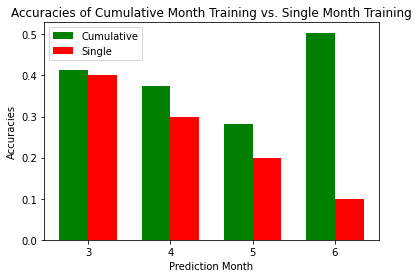

In [ ]:
import numpy as np

width = 0.35
x = np.array([i for i in range(3,7)])

fig, ax = plt.subplots()
rects1 = ax.bar(x, acc1, width, color='g')
rects2 = ax.bar(x + width, acc2, width, color='r')
ax.set_ylabel('Accuracies')
ax.set_xlabel('Prediction Month')
ax.set_title('Accuracies of Cumulative Month Training vs. Single Month Training')
ax.set_xticks(x + width/ 2)
ax.set_xticklabels(x)
ax.legend((rects1[0], rects2[0]), ('Cumulative', 'Single'))
plt.show()